# Preprocessing Workflow
This notebook describes data cleaning and further preparations

In [8]:
import pandas as pd

#loading the training and test dataset
data = pd.read_csv('../raw_data/train.csv')
test = pd.read_csv('../raw_data/test.csv')


In [34]:
data.dtypes.value_counts()

int64      130
float64      8
object       2
Name: count, dtype: int64

### Dropping null values

In [9]:
duplicate_count = len(data) - len(data.drop_duplicates())
duplicate_count

0

In [10]:
null_percentages = round(data.isnull().sum().sort_values(ascending=False)/len(data),2)
pd.set_option('display.max_rows', None)
print(null_percentages)
      

rez_esc            0.83
v18q1              0.77
v2a1               0.72
SQBmeaned          0.00
meaneduc           0.00
Id                 0.00
hogar_adul         0.00
parentesco10       0.00
parentesco11       0.00
parentesco12       0.00
idhogar            0.00
hogar_nin          0.00
dependency         0.00
hogar_mayor        0.00
hogar_total        0.00
edjefe             0.00
edjefa             0.00
instlevel1         0.00
instlevel2         0.00
parentesco9        0.00
parentesco7        0.00
parentesco8        0.00
estadocivil6       0.00
female             0.00
estadocivil1       0.00
estadocivil2       0.00
estadocivil3       0.00
estadocivil4       0.00
estadocivil5       0.00
estadocivil7       0.00
instlevel4         0.00
parentesco1        0.00
parentesco2        0.00
parentesco3        0.00
parentesco4        0.00
parentesco5        0.00
parentesco6        0.00
instlevel3         0.00
instlevel6         0.00
instlevel5         0.00
SQBescolari        0.00
lugar4          

In [23]:
columns_to_drop = []

for column in data.columns:
    if data[column].isnull().sum()/(len(data[column])) > 0.7:
        columns_to_drop.append(column)
        
data = data.drop(columns_to_drop, axis=1)

### Encoding

In [27]:
feat_categorical_nunique = X.select_dtypes(include = 'object')

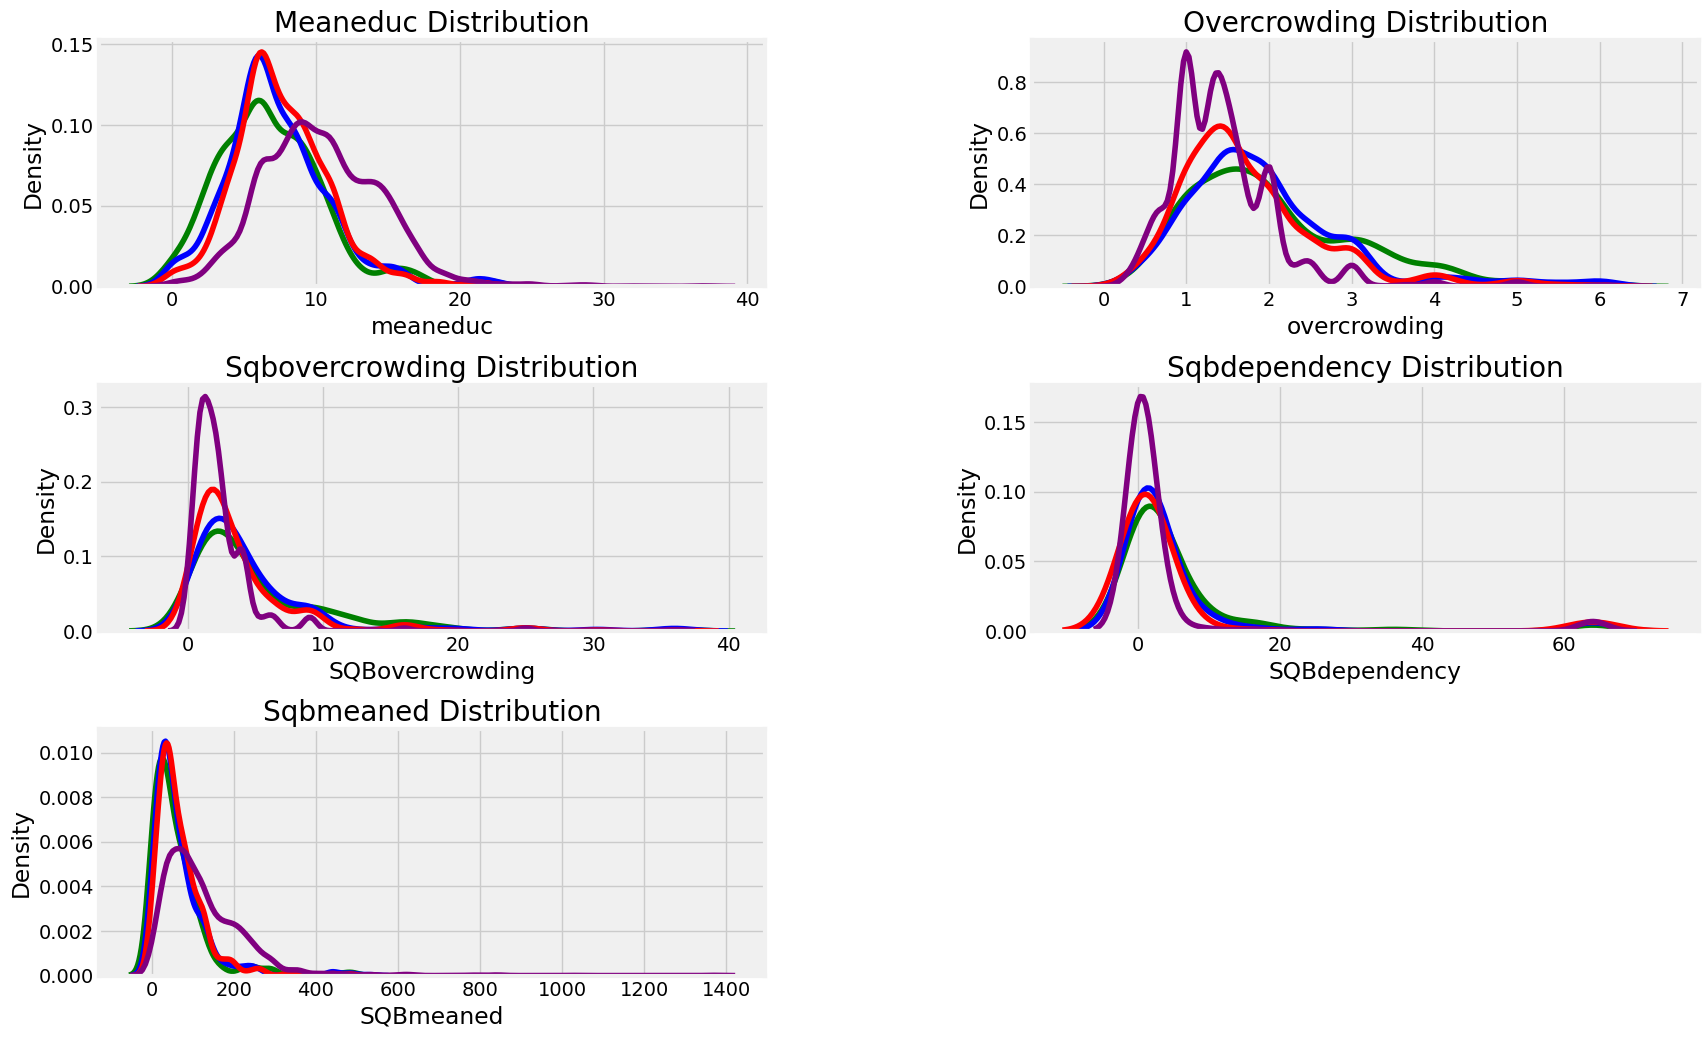

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict

# We build float columns

plt.figure(figsize = (20,16))
plt.style.use('fivethirtyeight')

colors = OrderedDict({1 : 'green', 2 : 'blue', 3: 'red', 4: 'purple'})
poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})


for i, col in enumerate(train.select_dtypes('float')):
    ax = plt.subplot (4,2,i+1)
    for poverty_level, color in colors.items():
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), ax = ax, color = color, label = poverty_mapping[poverty_level])
    
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4,hspace=0.4)

In [28]:
data.select_dtypes('object').columns

Index(['Id', 'idhogar'], dtype='object')

In [20]:
import numpy as np

mapping = {'yes' : 1, 'no' : 0  }

data['dependency'] = data['dependency'].replace(mapping).astype(np.float64)
data['edjefe'] = data['edjefe'].replace(mapping).astype(np.float64)
data['edjefa'] = data['edjefa'].replace(mapping).astype(np.float64)
    
data['dependency'].describe()

count    9557.000000
mean        1.149550
std         1.605993
min         0.000000
25%         0.333333
50%         0.666667
75%         1.333333
max         8.000000
Name: dependency, dtype: float64

In [21]:
data.head(5)

,Id,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,0,3,0,1,1,0,0,1,1,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,0,4,0,1,1,1,0,1,1,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,0,8,0,1,1,0,0,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,0,5,0,1,1,1,0,2,2,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,0,5,0,1,1,1,0,2,2,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [37]:
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

num_transformer = make_pipeline(
    SimpleImputer,
    MinMaxScaler
)

#cat_transformer = make_pipeline(
#    OneHotEncoder(handle_unknown='ignore'),
#)

preprocessor = make_column_transformer(
    (num_transformer, make_column_selector(dtype_include=['int64','float64'])
))


In [40]:
X = data.drop(columns = ['Target', 'Id'])
y = data['Target']

In [42]:
X.head(5)

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,0,3,0,1,1,0,0,1,1,0,...,43,100,1849,1,100,0,1.000000,0.0,100.0,1849
1,0,4,0,1,1,1,0,1,1,0,...,67,144,4489,1,144,0,1.000000,64.0,144.0,4489
2,0,8,0,1,1,0,0,0,0,0,...,92,121,8464,1,0,0,0.250000,64.0,121.0,8464
3,0,5,0,1,1,1,0,2,2,1,...,17,81,289,16,121,4,1.777778,1.0,121.0,289
4,0,5,0,1,1,1,0,2,2,1,...,37,121,1369,16,121,4,1.777778,1.0,121.0,1369
